## Gift To Tech: Single Transferable Vote

This Python Notebook is for calculating the winning project for Gift to Tech under the Single Transferable Voting system. Begin by putting in our voting parameters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

csv_filename = './sample.csv'
num_winners = 3
candidates = ['STAR (Students’ Temporary Assistance and Resources): Klemis Kitchen',
              'Alternative Service Breaks',
              'Collegiate Recovery Program',
              'Center for Serve-Learn-Sustain',
              'Center for the Study of Women Science and Technology'
             ]
num_votes = 3

Let's now go ahead and read in the voting csv data. We will also clean up the data.

In [2]:
gtt_data = pd.read_csv(csv_filename).astype(str)
print(gtt_data)
print('\n\n\n')

# Go through each vote and make sure it is filled in. If the cell has 'nan' then it should be filled with
# the value from the cell to the left
for row in range(len(gtt_data.index)):
    for col in range(1, num_votes):
        # Replace the cell value if it has nothing in it
        if gtt_data.iloc[row, col] == 'nan':
            gtt_data.iloc[row, col] = gtt_data.iloc[row, col-1]
print(gtt_data)
print('\n\n\n')

  Gift to Tech Top 8 Voting Spring 2019 - GTT Top 7 19-20 - select project  \
0  STAR (Students’ Temporary Assistance and Resou...                         
1                         Alternative Service Breaks                         
2                        Collegiate Recovery Program                         
3  STAR (Students’ Temporary Assistance and Resou...                         
4                     Center for Serve-Learn-Sustain                         
5                     Center for Serve-Learn-Sustain                         
6                     Center for Serve-Learn-Sustain                         
7  Center for the Study of Women Science and Tech...                         
8                     Center for Serve-Learn-Sustain                         
9                     Center for Serve-Learn-Sustain                         

  Gift to Tech Top 7 Voting Spring 2019 - GTT Top 7 19-20 - second choice  \
0                                                nan            

### Simulate Election
We will now cut down our number of canidates until there is only 'num_winners' left. Essentially, we are calculating the winners!

Start of round number: 1
Center for Serve-Learn-Sustain                                         5
STAR (Students’ Temporary Assistance and Resources): Klemis Kitchen    2
Collegiate Recovery Program                                            1
Alternative Service Breaks                                             1
Center for the Study of Women Science and Technology                   1
Name: Gift to Tech Top 8 Voting Spring 2019 - GTT Top 7 19-20 - select project, dtype: int64

End of round number: 1
Center for Serve-Learn-Sustain                                         5
STAR (Students’ Temporary Assistance and Resources): Klemis Kitchen    2
Collegiate Recovery Program                                            1
Empty Votes                                                            1
Center for the Study of Women Science and Technology                   1
Name: Gift to Tech Top 8 Voting Spring 2019 - GTT Top 7 19-20 - select project, dtype: int64




Start of round number: 2
Center

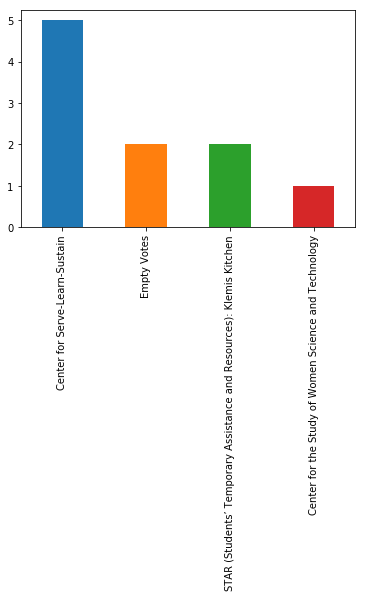

In [3]:
# Cut down number of winners to inputted amount
round_number = 1
for candidates_to_remove in range(len(candidates)-num_winners, 0, -1):
    print('Start of round number: ' + str(round_number))
    # Let's visualize the remaining candidates
    first_choices = gtt_data.iloc[:, 0]
    print(first_choices.value_counts())
    print('')
    
    # Calculate result of voteing round
    results = {}
    for choice in first_choices:
        if choice in results:
            results[choice] += 1
        else:
            results[choice] = 1
    # Select losing candidate
    least_popular_candidate = None
    min_votes = None
    for candidate, candidate_votes in results.items():
        # Just needed to prevent empty votes from being considered
        if candidate == 'Empty Votes': continue
        
        if min_votes is None:
            min_votes = candidate_votes
            least_popular_candidate = candidate
        if candidate_votes < min_votes:
            min_votes = candidate_votes
            least_popular_candidate = candidate
            
    
    # Delete least popular candidate choice
    for row in range(len(gtt_data.index)):
        for col in range(num_votes - 1, -1, -1):
            if gtt_data.iloc[row, col] == least_popular_candidate:
                gtt_data.iloc[row, col] = 'Empty Votes'
    # "Shift" choices over
    for row in range(len(gtt_data.index)):
        for col in range(num_votes - 1, -1, -1):
            if gtt_data.iloc[row, col] == 'Empty Votes':
                if col != num_votes - 1:
                    gtt_data.iloc[row, col] = gtt_data.iloc[row, col + 1] 

    # Remove them from the list of candidates
    print('End of round number: ' + str(round_number))
    print(first_choices.value_counts())
    print('\n\n\n')
    round_number += 1
    
# Plot new candidate counts
first_choices.value_counts().plot('bar')


## The Winner
And the winner is ^^^^^^